1. 4개의 이미지 생성 및 로드 후 현재날짜 폴더에 저장. 
2. 이미지 전처리
3. 모델로 예측
4. 예측값 저장

0,1,2,3 = [그렇지 않다, 조금 그렇다, 그렇다, 매우 그렇다]

1. 샴푸 후 얼마 지나지  않아 당기고 가렵거나 따갑다
2. 머리를 하루만 감지 않아도 기름이 진다
3. 두피를 긁으면 쉽게 붉어진다
4. 두피에 뾰루지가 난다
5. 머리카락이 요즘들어 많이 빠진다
6. 머리 숱이 적어 진 것 같다

In [132]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행 후 runtime 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,347 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
survey = [2,0,2,2,3,3]

In [2]:
# 모듈 호출
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import requests
from datetime import datetime
import os
from datetime import date
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [13]:
option = int(input('load image?(1), take image? (2) '))

load image?(1), take image? (2) 2


In [4]:
today = date.today()
date = today.strftime('%y_%m_%d')
date

'22_04_22'

In [11]:
img_path = '../'
img_path
os.makedirs(img_path, exist_ok=True)  #덮어쓰기 가능하려면  True
print("{} folder is created!".format(img_path))

../ folder is created!


In [15]:
#4개의 이미지 (1, 2, 3, 4. jpg)  오늘 날짜 파일에 저장
img_counter = 1

if option == 2:
    cap = cv2.VideoCapture(0) # 영상을 읽어올 카메라 지정

    if not cap.isOpened(): # 카메라가 제대로 설정되지 않을 시 오류 메세지 출력
        print('video capture failed')
        sys.exit()

    while True: 
        ret, frame = cap.read() # 카메라를 통해 영상 읽어오기

        if not ret: # 영상 읽기 실패 시 오류 메세지 출력
            print('videos read failed')
            break

        cv2.imshow("camera",frame) # 창에 영상 표시 
        if cv2.waitKey(20) == ord('s'): # 's' 키를 입력 시 해당 시점의 영상을 저장
            img_name = "{}.jpg".format(img_counter)
            cv2.imwrite(img_name, frame)
            print("{} written! ".format(img_name))
            img_counter += 1
            
            if img_counter == 5:
              break

        if cv2.waitKey(20) == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break

    cap.release()
    cv2.destroyAllWindows() # 카메라 및 창 닫기
if option == 1:
    print('put 4 files in {} folder'.format(img_path))
else: 
    print("wrong input")
    option = int(input('load image?(1), take image? (2) '))

1.jpg written! 
2.jpg written! 
3.jpg written! 
4.jpg written! 
wrong input
load image?(1), take image? (2) 1


In [46]:
images_path = glob.glob(img_path + '/*.jpg')
num_img = len(images_path)

if num_img != 4:
  raise Exception('Need 4 imges to process!!')
  raise UserWarning('Exit Early')
else:
  print('good to go')


good to go


In [8]:
#img resize
for img in images_path:
  i = img[-5]
  img= cv2.imread(img)
  imgname = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러타입을 RGB로 변경
  imgname= cv2.resize(img,(224,224))/255.0 # 입력값으로 쓰기위해 리사이즈 및 스케일링
  imgname = img.reshape((1,)+img.shape) # 입력값으로 형태 변경
  
  return imgname

img = cv2.imread('/content/drive/MyDrive/Final_Project/Test/folliculitis/folliculitis_2/0617_A2LEBJJDE000815_1606535616973_2_TH.jpg') # 저장된 이미지 불러오기
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러타입을 RGB로 변경
img = cv2.resize(img,(224,224))/255.0 # 입력값으로 쓰기위해 리사이즈 및 스케일링
img = img.reshape((1,)+img.shape) # 입력값으로 형태 변경

In [134]:
model_path ='/content/drive/MyDrive/Final_Project/구세은/model'
glob.glob(model_path + '/*')

['/content/drive/MyDrive/Final_Project/구세은/model/folliculitis_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/dryscalp_resnet1.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/erythema_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/dandruff_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/oilyscalp_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/hairloss_resnet.h5']

In [ ]:
# def findKey(search_value):
#     for key, value in dic.items():
#         if(value == search_value):
#             return key
#     return -1

In [137]:
def scalp_score(img_path, model_path):
  out = []
  img_folder_paths = glob.glob(img_path + '/*.jpg')
  model_paths = glob.glob(model_path + '/*')
  for i in img_folder_paths:
    image_name = i[-5]
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    image = np.array(image)*1./255
    image = image.reshape(1, 224,224,3)
    for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])
  out = pd.DataFrame(out, columns = ['image_name', 'model_name', 'predict'])
  return(out)


In [138]:
start = time.time()
df = scalp_score(img_path, model_path)
end = time.time()
print(f'total time(s):{end-start}')

total time(s):282.4456307888031


In [139]:
df

,image_name,model_name,predict
0,2,folliculitis,1
1,2,dryscalp,3
2,2,erythema,2
3,2,dandruff,3
4,2,oilyscalp,2
5,2,hairloss,2
6,4,folliculitis,1
7,4,dryscalp,2
8,4,erythema,2
9,4,dandruff,2


In [159]:
mean = df.groupby(by='model_name').mean().reset_index()
mean = mean.set_index('model_name')
mean


,predict
model_name,
dandruff,2.25
dryscalp,2.25
erythema,2.00
folliculitis,1.50
hairloss,1.75
oilyscalp,2.00


In [214]:
scalp_type = np.where(survey[0] >survey[1], '건성', 
                      np.where(survey[0] < survey[1],'지성', '중성')).tolist()
scalp_type

'건성'

In [211]:
scalp_score = np.where (scalp_type == 0, 0, round((mean.predict.dryscalp + mean.predict.oilyscalp )/2, 1)).tolist()
scalp_score

2.1

In [197]:
hairloss_score = round(np.mean([mean.predict.hairloss  , min(survey[4], survey[5])]),1)
hairloss_score

2.4

In [201]:
sensitivity_score = round(np.mean([mean.predict.erythema, survey[2] ]),1)
sensitivity_score

2.0

In [203]:
dandruff_score = round(np.mean([mean.predict.dandruff, mean.predict.folliculitis]),1)
dandruff_score

1.9

In [204]:
folliculitis_score = round(np.mean([mean.predict.folliculitis, survey[3], mean.predict.erythema]),1)
dandruff_score

1.9

In [212]:
final_list = [scalp_score, hairloss_score, sensitivity_score, dandruff_score, folliculitis_score]

In [2]:
final_list

NameError: ignored

In [8]:
final_index = ['악건성/악지성', '탈모', '민감도', '비듬', '두피염' ]

In [97]:
# image = cv2.imread('/content/drive/MyDrive/Final_Project/구세은/22_04_19/1.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image,(224,224))
# image = np.array(image)*1./255
# image = image.reshape(1, 224,224,3)
# model = load_model('/content/drive/MyDrive/Final_Project/박현우/model/dandruff_resnet.h5')   
# prediction =model.predict(image)
# max = np.argmax(prediction)


In [116]:
# pre= prediction.tolist()[0]

# value = [0,1,2,3]
# sum = 0 
# for i in value:
#   sum = sum + pre[i]*i

# sum
#평균과 최대값 비슷. 그냥 최대값으로...?있어보이게 평균?

2.0002695919144964

In [114]:
# pre

[5.088458578939026e-07,
 6.88254009340028e-10,
 0.9997288584709167,
 0.0002706247614696622]

In [115]:
# max

2

In [218]:
print('ㅇㅇ님의 두피 타입은 {} 입니다. 두피 분석 결과는 아래와 같습니다.'.format(scalp_type))

ㅇㅇ님의 두피 타입은 건성 입니다. 두피 분석 결과는 아래와 같습니다.


In [49]:
####radar chart######

plt.rc('font', family='NanumBarunGothic')

labels= final_index
markers = [0, 1, 2, 3]


def make_radar_chart(name, stats, attribute_labels=labels,
                     plot_markers=markers):

    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)

    fig.savefig("{}_radar_chart.png".format(name))
    # ax.text(0, 0 + 0.05, "양호", size=10)
    # ax.text(-0.4, 0.5 + PAD, "50%", size=16)

    return plt.show()



In [42]:
stats = [1,2,3,2,2]
stats = np.concatenate((stats,[stats[0]]))
stats

array([1, 2, 3, 2, 2, 1])

In [10]:
make_radar_chart(date, final_list) 

NameError: ignored

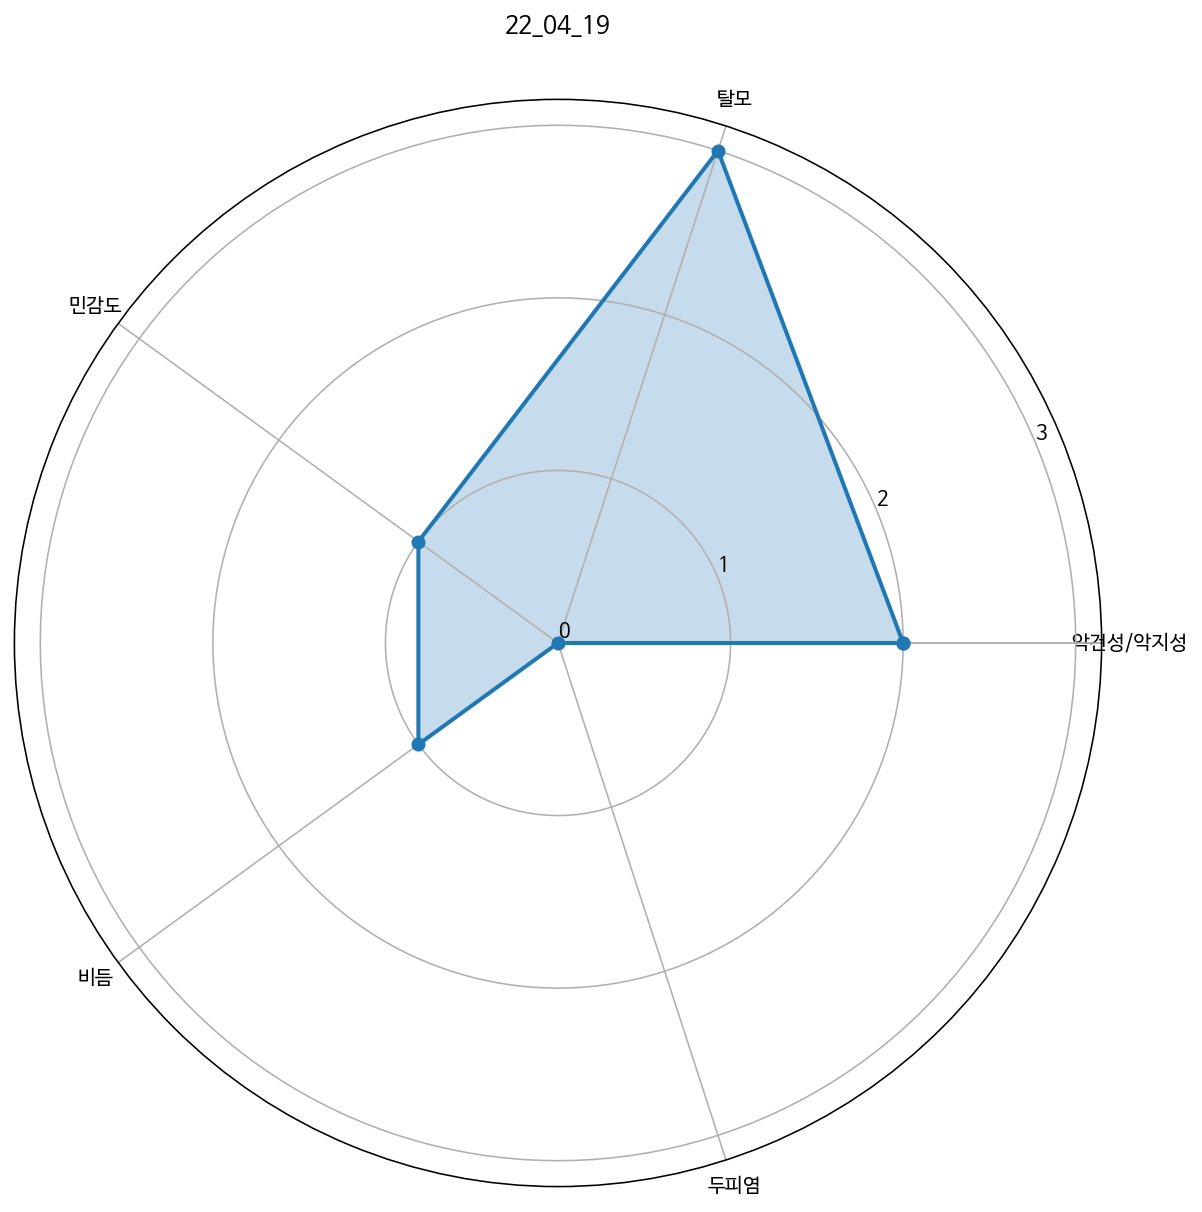

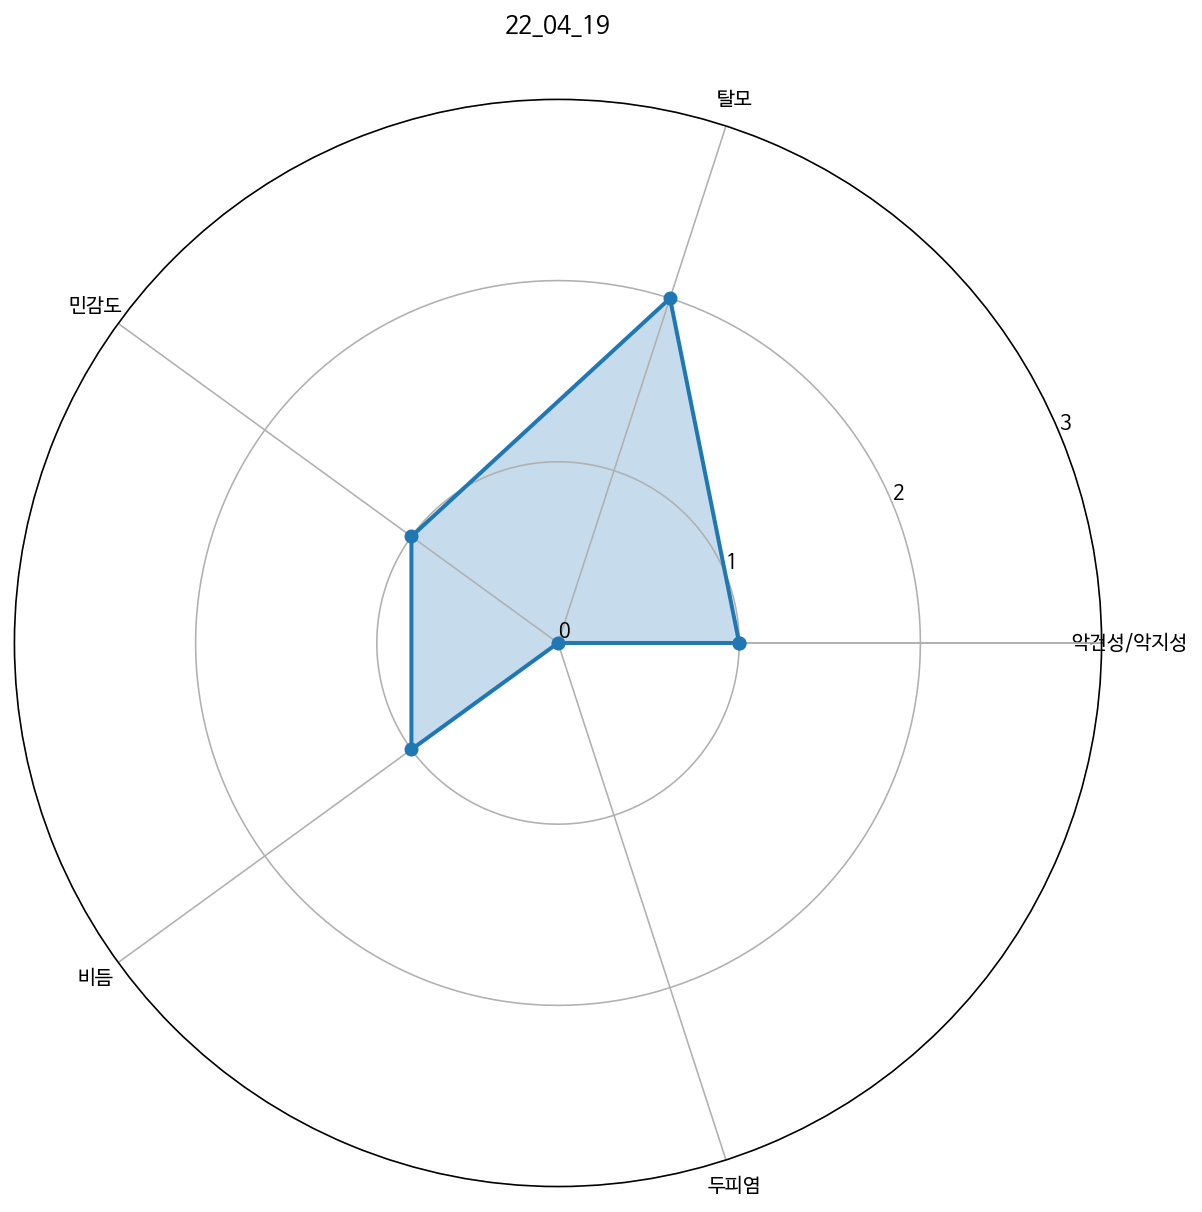

In [50]:
make_radar_chart(date, [2,3,1,1,0]) 
make_radar_chart(date, [1,2,1,1,0]) 

In [47]:
## multiple radar chart
labels= final_index
markers = [0, 1, 2, 3]

def make_radar_multi_chart(name_list, stats_list, attribute_labels=labels,
                     plot_markers=markers):
    colors = ["#FF5A5F", "#FFB400", "#007A87"]
    labels = np.array(attribute_labels)
    fig = plt.figure(figsize = (14,14))
    ax = fig.add_subplot(111, polar=True)
    for idx, stats in enumerate(stats_list):
      angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
      stats = np.concatenate((stats,[stats[0]]))
      angles = np.concatenate((angles,[angles[0]]))
      ax.plot(angles, stats, 'o-', linewidth=2, c = colors[idx])
      ax.fill(angles, stats, alpha=0.25,c = colors[idx])
    # fig = plt.figure(figsize = (14,14))
    # ax = fig.add_subplot(111, polar=True)
    # ax.plot(angles, stats, 'o-', linewidth=2)
    # ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    # ax.set_title(name)
    ax.grid(True)
    ax.legend(name_list)

    fig.savefig("{}_radar_chart_multi.png".format(name_list[-1]))
    # ax.text(0, 0 + 0.05, "양호", size=10)
    # ax.text(-0.4, 0.5 + PAD, "50%", size=16)

    return plt.show()

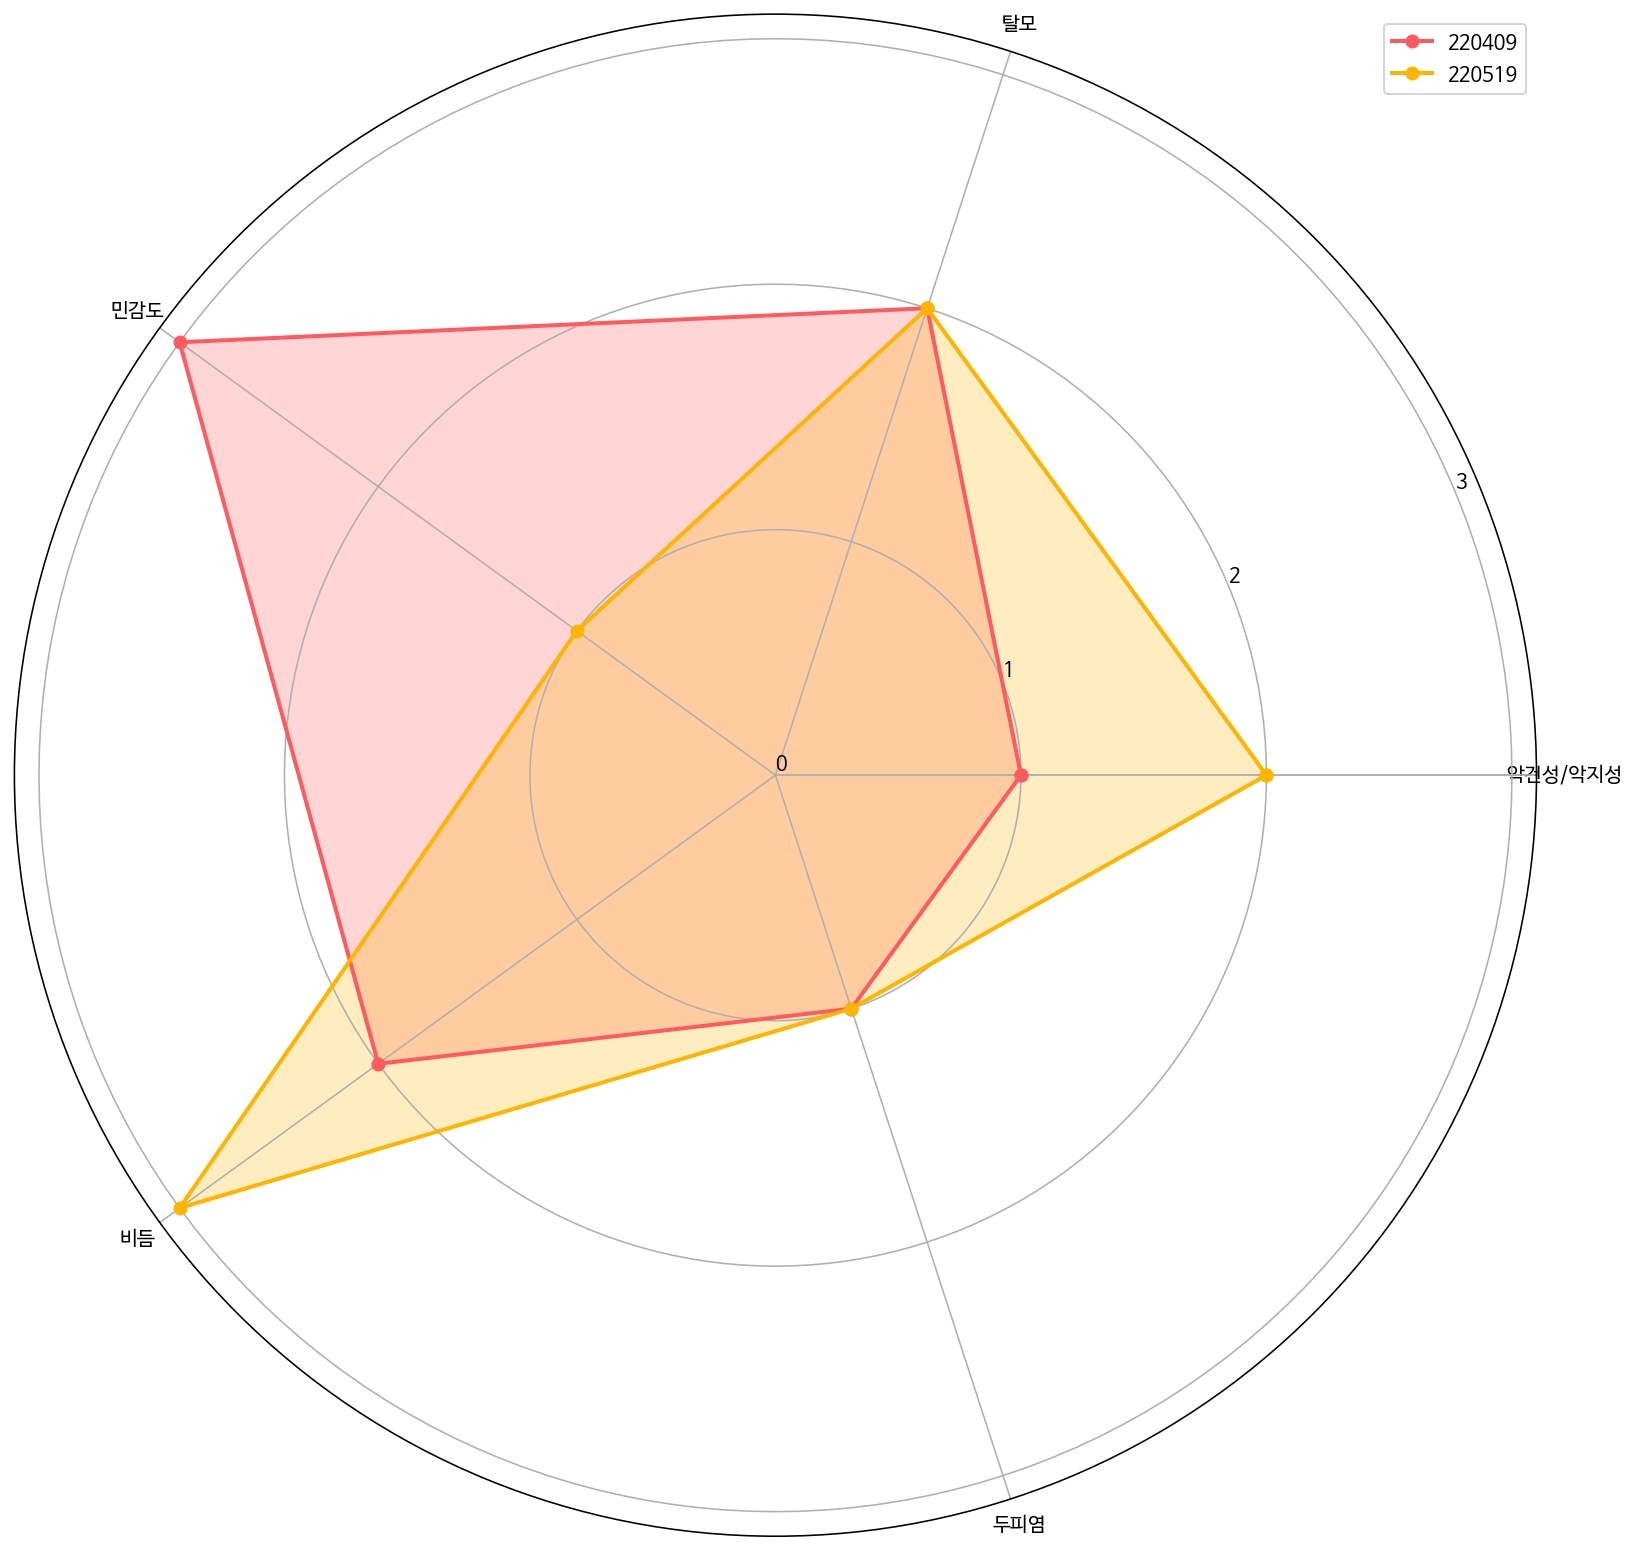

In [48]:
make_radar_multi_chart([22_04_09, 22_05_19], [[1,2,3,2,1],[2,2,1,3,1]])

In [43]:
stats = [[1,2,3,2,1],[2,2,1,3,1]]

In [44]:
stats[0]

[1, 2, 3, 2, 1]